# Python Language Basics, IPython

## Comandos mágicos

Los comandos especiales de IPython (que no están integrados en Python) son llamados comandos “magicos”. Estan diseñados para facilitar tareas comunes y permitirte controlar el comportamiento del sistema IPython. Los comandos mágicos tienen el prefijo %. Por ejemplo **%load** permite ejecutar cualquier archivo python que se encuentre en el directorio actual.

In [25]:
# %load jup.py
import numpy as np 
a=1
b=3
print(a+b)
np.multiply(2,np.array([[1],[2]]))

4


array([[2],
       [4]])

El comando **%timeit** revisa el tiempo de ejecución de cualquier declaración de Python, como multiplicacion matricial.

In [29]:
import numpy as np
a = np.random.randn(100, 100)

In [31]:
%timeit np.dot(a,a)

32.9 µs ± 2.22 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Muchos tienen opciones de linea de comando adicionales que pueden ser vistas usando **?**

In [32]:
%debug?

Las funciones mágicas pueden ser usadas sin el % siempre que no existan variables ya definidas con el mismo nombre. Esto se llama **automagia** y se puede activar o desactivar con **%automagic**

Algunas funciones mágicas pueden comportarse como funciones de Python y su 'output' puede asignarse a una variable.

In [34]:
%pwd

'C:\\Users\\Asus\\Mis Jupyter\\Python-Notes\\DataAnalysis'

In [36]:
myDir = %pwd
print(myDir)

C:\Users\Asus\Mis Jupyter\Python-Notes\DataAnalysis


Puedes ver más comandos especiales escribiendo **%quickref** o **%magic**. En la siguiente tabla algunos comandos básicos

|Command | Description|
|---|--------|
%quickref |Display the IPython Quick Reference Card
%magic |Display detailed documentation for all of the available magic commands
%debug |Enter the interactive debugger at the bottom of the last exception traceback
%hist |Print command input (and optionally output) history
%pdb |Automatically enter debugger after any exception
%paste| Execute preformatted Python code from clipboard
%cpaste| Open a special prompt for manually pasting Python code to be executed
%reset |Delete all variables/names defined in interactive namespace
%page |OBJECT Pretty-print the object and display it through a pager
%run |script.py Run a Python script inside IPython

## Integración con Matplotlib

IPython se integra bien con librerías de visualización de datos. La función mágica **%matplotlib** configura la integración con Jupyter o el shell de IPython. Esto es importante, porque de lo contrario los plots o no aparecerán (Jupyter) o tomarán el control de la sesión hasta que se cierre (shell IPython).

En el shell de IPython **%matplotlib** configura de manera que puedas crear múltiples plots sin interferir con la sesión en la consola.

```
In [26]: %matplotlib
Using matplotlib backend: Qt4Agg
```

En Jupyter el comando es **%matplotlib inline**

In [39]:
%matplotlib inline

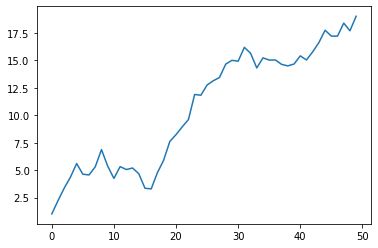

In [43]:
import matplotlib.pyplot as plt
plt.plot(np.random.randn(50).cumsum())

## Semántica del lenguaje

### Identación

- Python usa espacios en blanco (tabulaciones o espacios) para estructurar el código en lugar de usar llaves.
    - Se recomienda usar 4 espacios de indentación usando 4 tabulaciones, es el estándar.
- Las declaraciones de Python no necesitan terminar con punto y coma.
    - Sin embargo, los punto y coma se pueden usar para separar múltiples declaraciones en una sola línea.

In [44]:
a = 5; b = 6; c = 7; print(a)

5


### Todo es un objeto

- Cada número, cadena, estructura de datos, función, clase, módulo, etc. existe en el intérprete de Python en su propio "cuadro", que se conoce como un objeto de Python.
    - Cada objeto tiene un tipo asociado (por ejemplo, cadena o función) y datos internos.

### Comentarios

- El intérprete de Python ignora cualquier texto precedido por la marca hash **#**.
    - Esto se usa a menudo para agregar comentarios al código.

### Funciones y métodos de llamado de objetos

- Las funciones se llaman usando paréntesis y pasando cero o más argumentos, opcionalmente puedes asignar el output a una variable.
    - Casi todos los objetos en Python tienen funciones adjuntas, conocidas como **métodos**, que tienen acceso a los contenidos internos del objeto. Ej: np.array(), array es el método y numpy el objeto.

### Variables y pase de argumentos

- Cuando asignamos una variable (o nombre) en Python, creamos una **referencia** al objeto del lado derecho del signo igual. 
    - En python la asignación causa que a y b refieran al mismo objeto (la lista original) [1,2,3]

In [2]:
a = [1,2,3]
b = a

# Comprobamos que son lo mismo cuando usamos el método append
a.append(4)
print(b)   # Out: [1, 2, 3, 4]

[1, 2, 3, 4]


- La asignación también se conoce como **binding** (vinculación), ya que vinculamos un nombre a un objeto. Los nombres de las variables que se han asignado pueden ocasionalmente ser referidas como variables vinculadas.
- Cuando pasamos objetos como argumentos a una función, se crean nuevas variables locales que hacen referencia a los objetos originales sin ninguna copia. Si vinculas un nuevo objeto a una variable dentro de una función, ese cambio no será reflejado en el alcance del padre. Por lo tanto, es posible alterar las partes internas de un argumento mutable. Por ejemplo:

In [3]:
def append_element(some_list, element):
    some_list.append(element)

In [18]:
data = [1,2,3]
b = data
append_element(data, 4)
print(data) # Out: [1, 2, 3, 4]
print(b)

[1, 2, 3, 4]
[1, 2, 3, 4]


### Referencias dinámicas, tipos strong

- A diferencia de muchos lenguajes compilados, como Java y C ++, las referencias a objetos en Python no tienen ningún tipo asociado.

In [21]:
a = 5
type(a)

int

In [22]:
a = 'foo'
type(a)

str

- Las variables son nombres para objetos dentro de un namespace en particular; la información del tipo es almacenado en el mismo objeto. Sin embargo, concluir apresuradamente que Python no es un "lenguaje escrito" es erróneo. Ejemplo:

In [23]:
'5' + 5

TypeError: can only concatenate str (not "int") to str

- Algunos lenguajes, como Visual Basic, convierten implícitamentela el string '5' a un número entero, que resulta en 10. Otros, como JavaScript, convierten el int 5 a un string, produciendo la cadena concatenada '55'. En esto Python se considera un lenguaje **fuertemente tipado**, lo que significa que **cada objeto tiene un tipo específico (o clase)**, y las conversiones implícitas ocurrirán solo en ciertas obvias circunstancias, como las siguientes:

In [24]:
a = 4.5
b = 2

# String formatting, to be visited later
print('a is {0}, b is {1}'.format(type(a), type(b)))

a is <class 'float'>, b is <class 'int'>


In [25]:
a / b 

2.25

- Conocer qué tipo tiene un objeto es importante, y es útil poder escribir funciones que puedan manejar diferentes tipos de entrada. Puedes verificar si un objeto es una instancia de un tipo en particular usando la función **isinstance**.

In [26]:
a = 5
isinstance(a, int)

True

In [28]:
# También acepta tuples si quieres comprobar varios tipos en particular.
isinstance(a, (int, float))

True

### Atributos y métodos

- Los objetos en Python suelen tener **atributos** (otros objetos Python almacenados "dentro" del objeto) y **métodos** (funciones asociadas a un objeto que pueden tener acceso a los datos internos del objeto). Se accede a ambos a través de la sintaxis **obj.attribute_name**.
    - También se puede acceder a los atributos y métodos por nombre a través de la función **getattr**

In [30]:
a = 'foo'
getattr(a, 'split')

<function str.split(sep=None, maxsplit=-1)>

- En otros lenguajes, el acceso a los objetos por su nombre a menudo se denomina "reflexión". No usaremos en este libro las funciones getattr u otras funciones relacionadas como hasattr, setattr; pero estas funciones se pueden usar de manera muy efectiva para escribir código genérico y reutilizable.

### Duck typing

- A menudo, es posible que no le interese el tipo de objeto, sino si este tiene ciertos métodos o cierto comportamiento. Esto a veces se llama "duck typing", por el dicho "Si camina como un pato y grazna como un pato, entonces es un pato". Por ejemplo, puedes verificar que un objeto sea iterable si implementa el "protocolo iterador". Para muchos objetos, esto significa que tiene un **\_\_iter__** "método mágico", aunque una mejor alternativa de verificar es intentar usar la función **iter**. En el ejemplo la función "isiterable" retornará True para strings así como muchos otros de tipo colección.

In [1]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:  # not iterable
        return False

In [4]:
print(isiterable('soy string'))
print(isiterable(5))

True
False


- Un lugar donde puede usarse esta funcionalidad es cuando escriba funciones que pueden aceptar cualquier tipo de secuencia (lista, tupla, ndarray) o incluso un iterador. Primero puede verificar si el objeto es una lista (o NumPy array) y, si no lo es, convertirlo en uno. Ejemplo:

In [ ]:
if not isinstance(x, list) and isiterable(x):
    x = list(x)

### Imports

- En Python un **modulo** es simplemente un archivo .py que contiene código Python. Por ejemplo supongamos que tenemos el siguiente modulo.

In [8]:
# some_module.py
PY = 3.14159

def f(x):
    return x + 2
def g(a, b):
    return a + b

- Se puede usar **as** para darle al un nombre diferente al módulo importado. Si quisiéramos acceder a las variables y funciones definidas en some_module.py, desde otro archivo en el mismo directorio podríamos hacer:

In [ ]:
import some_module as sm

result = sm.f(5)
pi = sm.PI

- O sus equivalente:

In [ ]:
from some_module import f, g, PI
result = g(5, PI)

In [ ]:
import some_module as sm
from some_module import PI as pi, g as gf

r1 = sm.f(pi)
r2 = gf(6, pi)

### Operaciones binarias y comparaciones

- La mayoría de operaciones matemáticas binarias son como se espera:

In [10]:
5-2

3

In [11]:
12+21.5

33.5

In [12]:
5 <= 2

False

- Para verificar si dos referencias refieren al mismo objeto, use la palabra clave **is**, **is not** también es perfectamente válido si desea comprobar que dos objetos no son lo mismo.
    - Como **list** siempre crea una nueva lista de Python (es decir, una copia), podemos estar seguros de que c es distinto que a. Comparar con **is** no es lo mismo que el operador **==**, por ejemplo:

In [15]:
a = [1, 2, 3]
b = a
c = list(a)

print(a is b)  # si ambos referencia al mismo objeto
print(a is not c)  
print(a == c) # Si ambos son iguales

True
True
True


- La tabla muestra algunas operaciones que se pueden hacer en Python.

|Operación | Descripción|
|---|--------|
a // b | División de a por b, dejando cualquier resto fraccional
a & b | True si a y b son True; para enteros, use el bit-bit AND
a \| b | True si a o b son True; para enteros, use el bit-bit OR
a ^ b | Para booleanos, True si a o b es True, pero no ambos; para enteros, use el bit-bit EXCLUSIVE-OR

### Objetos mutables e inmutables 

- La mayoría de los objetos en Python, como las listas, dictionarios, NumPy arrays y casi todos los tipos definidos por el usuario (clases), son mutables. Esto significa que el objeto o los valores que contienen pueden modificarse. Mientras que otros como strings y tuples son inmutables.

In [17]:
a_list = ['foo', 2, [4, 5]]  # a_list es una lista
a_list[2] = (3, 4)  # se puede modificar 
a_list

['foo', 2, (3, 4)]

In [18]:
a_tuple = (3, 5, (4, 5))  # es una tuple
a_tuple[1] = 'four'  # genera error cuando se intenta modificar 

TypeError: 'tuple' object does not support item assignment

- Recuerde que solo porque puedes mutar un objeto no significa que siempre debas hacerlo. Tales acciones se conocen como **_efectos secundarios_**. Por ejemplo, al escribir una función, cualquier efecto secundario debe comunicarse explícitamente al usuario en la documentación o comentarios de la función. Si es posible, recomiendan tratar de evitar los efectos secundarios y **_favorecer la inmutabilidad_**, aunque pueda haber objetos mutables involucrados.

## Tipos escalares

Python junto con su biblioteca estándar tiene un pequeño conjunto de tipos built-in para manejar datos numéricos, cadenas, valores booleanos (verdadero o falso) y fechas y horas. Estos tipos de "valor único" a veces se denominan escalares y nos referimos a ellos en este libro como escalares. La Tabla muestra una lista de los principales tipos escalares. La fecha y hora se discutirán por separado, ya que estos son proporcionados por el módulo **datetime** de la biblioteca estándar.

### Tipos numéricos

- Los int y float son los tipos primarios de Python. **int** puede tomar valores arbitrariamente largos.

In [20]:
ival = 17239871
ival ** 6

26254519291092456596965462913230729701102721

- Los números punto flotante se representan con el tipo **float**. En realidad, tiene un valor de doble precisión (64 bits). También se pueden expresar con notación científica:

In [22]:
fval2 = 6.78e-5
fval2

6.78e-05

### Strings

- Muchas personas usan Python por su potente y flexible capacidad integrada de procesamiento de cadenas (string). Puedes escribir __string literals__ usando comillas simples o dobles ".

In [23]:
a = 'one way of writing a string'
b = "another way"

- Para cadenas multilínea con saltos de línea, puede usar comillas triples, ''' o """:

In [24]:
c = """
This is a longer string that
spans multiple lines
"""

- El string c en realidad contiene cuatro líneas de texto; los saltos de línea después de """ y después de las líneas se incluyen en el string. Podemos contar los nuevos caracteres de línea con el método **count** en c.

In [26]:
c.count('\n')

3

- No se pueden modificar los string en Python (son imnutables).

In [27]:
a = 'this is a string'
a[10] = 'f'

TypeError: 'str' object does not support item assignment

In [30]:
b = a.replace('string', 'longer string')
print(b)
print(a)  # a permanece no modificado

this is a longer string
this is a string


- Muchos objetos pueden convertirse en string con la función **str**.

In [31]:
a = 5.6
s = str(a)
print(type(s))

<class 'str'>


- Las cadenas son una secuencia de caracteres Unicode y, por lo tanto, pueden tratarse como otros secuencias (listas y tuplas).

In [32]:
s = 'python'
list(s)

['p', 'y', 't', 'h', 'o', 'n']

In [33]:
s[:3]

'pyt'

- La sintaxis **s[:3]** se llama **slicing** y se implementa para muchos tipos de secuencias de Python. El carácter de barra diagonal inversa __\__ es un *carácter de escape*, que significa que se utiliza para especificar caracteres especiales como nueva línea **\n** o caracteres Unicode. Para escribir un string literal con backslash \\ necesitas el escape \\.

In [35]:
s = '12\\34'
print(s)

12\34


- Puede poner como prefacio de la comilla inicial del string con **r**, que significa que los caracteres deben interpretarse como son. El **r** significa _raw_.

In [36]:
s = r'this\has\no\special\characters'
s

'this\\has\\no\\special\\characters'

- Al sumar strings se concatenan y producen un nuevo string

In [37]:
a = 'this is the first half '
b = 'and this is the second half'

a + b

'this is the first half and this is the second half'

- La creación de plantillas o el formato de string también es importante. La cantidad de formas de hacerlo han aumentado con Python 3, describiré brevemente la mecánica de una de las interfaces principales. Los objetos string tienen un método **format** que se puede usar para sustituir argumentos formateados en el string, produciendo un nuevo string.

In [40]:
template = '{0:.2f} {1:s} are worth US${2:d}'

- En el string template:
    - ``` {0:.2f} ``` significa formatear el primer argumento como un número punto flotante con dos decimales.
    - ``` {1:s} ``` significa formatear el segundo argumento como un string.
    - ``` {2:d} ``` significa formatear el tercer argumento como un entero exacto.
- Para sustituir argumentos por estos parámetros de formato, pasamos una secuencia de argumentos al método **format**:

In [41]:
template.format(4.5560, 'Argentine Pesos', 1)

'4.56 Argentine Pesos are worth US$1'

### Bytes y Unicode

- En Python 3.0 y superior, Unicode se ha convertido en el tipo de string de primera clase para permitir un manejo más coherente del texto ASCII y no ASCII. En versiones anteriores de Python, los strings eran todos bytes sin ninguna codificación Unicode explícita. Puedes convertir a Unicode suponiendo que conociera la codificación de caracteres. Ejemplo:

In [42]:
val = "español"

- Podemos convertir este string Unicode a su representacion UTF-8 bytes usando el método **encode**.

In [43]:
val_utf8 = val.encode('utf-8')
print(val_utf8)
print(type(val_utf8))

b'espa\xc3\xb1ol'
<class 'bytes'>


- Suponiendo que conoce la codificación Unicode de un objeto bytes, puede regresar utilizando el método de **decode**.

In [44]:
val_utf8.decode('utf-8')

'español'

- Si bien se ha preferido usar UTF-8 para cualquier codificación, por razones históricas podrías encontrar datos en cualquier cantidad de codificaciones diferentes.

In [47]:
print(val.encode('latin1'))
print(val.encode('utf-16'))
print(val.encode('utf-16le'))

b'espa\xf1ol'
b'\xff\xfee\x00s\x00p\x00a\x00\xf1\x00o\x00l\x00'
b'e\x00s\x00p\x00a\x00\xf1\x00o\x00l\x00'


- Es más común encontrar objetos **bytes** al trabajar con archivos, donde no es deseable decodificar implícitamente todos los datos a strings Unicode. Aunque rara vez lo necesites, puedes definir tus propios byte literals anteponiendo una cadena con **b**.

In [48]:
bytes_val = b'this is bytes'
bytes_val

b'this is bytes'

In [49]:
decoded = bytes_val.decode('utf8')
decoded # este es string (Unicode) ahora

'this is bytes'

### Booleans

- Los dos valores booleanos en Python se escriben como **True** y **False**. Comparaciones y otras expresiones condicionales se evalúan como **True** o **False**. Los valores booleanos se combinan con las palabras clave **and** y **or**.

In [51]:
False or True

True

### Type casting

- Los tipos **str, bool, int, y float** también son funciones que se pueden usar para arrojar valores a esos tipos.

In [50]:
s = '3.14159'
fval = float(s)
print(type(fval))
print(int(fval))
print(bool(fval))
print(bool(0))

float

### None

- **None** es el tipo de valor nulo en Python. Si una función no devuelve explícitamente un valor, implícitamente devuelve **None**.

In [53]:
a = None
b = 5

print(a is None)
print(b is not None)

True
True


- **None** es también un valor predeterminado común para argumentos de función.

In [54]:
def add_and_maybe_multiply(a, b, c=None):
    result = a + b
    if c is not None:
        result = result * c
    return result

- Si bien es un punto técnico, vale la pena tener en cuenta que **None** no solo es una palabra clave reservada, sino también una instancia única de **NoneType**.

In [55]:
type(None)

NoneType

### Fechas y horas

- El módulo built-in **datetime** de Python proporciona los tipos **datetime, date, y time**. El tipo **datetime**, como imaginarás, combina la información almacenada en **date** y **time** y es la más utilizada.

In [2]:
from datetime import datetime, date, time
dt = datetime(2011, 10, 29, 20, 30, 21)

print(dt.day)
print(dt.minute)

29
30


- Dada una instancia **datetime**, puede extraerse los objetos **date** y **time** equivalentes llamando a métodos de **datetime** con el mismo nombre.

In [57]:
dt.date()

datetime.date(2011, 10, 29)

In [58]:
dt.time()

datetime.time(20, 30, 21)

- El método **strftime** formatea un **datetime** como un string.

In [5]:
dt.strftime('%m/%d/%Y %H:%M')

'10/29/2011 20:30'

- Los strings pueden ser convertidos (parsed) en objectos **datetime** con la función **strptime**.

In [4]:
datetime.strptime('20091031', '%Y%m%d')

datetime.datetime(2009, 10, 31, 0, 0)

- Como **datetime.datetime** es de tipo inmutable, métodos como los mencionados siempre producen nuevos objetos. La diferencia de dos objetos **datetime** produce un tipo **datetime.timedelta**.

In [6]:
dt2 = datetime(2011, 11, 15, 22, 30)
delta = dt2 - dt
delta

datetime.timedelta(days=17, seconds=7179)

- El **datetime.timedelta(17, 7179)** indica que el timedelta codifica un desplazamiento de 17 días y 7,179 segundos. Agregar un timedelta a un **datetime** produce un nuevo **datetime** desplazado.

In [8]:
dt

datetime.datetime(2011, 10, 29, 20, 30, 21)

In [7]:
dt+delta

datetime.datetime(2011, 11, 15, 22, 30)

|Tipo | Descripción|
|---|--------|
%Y | Año de cuatro dígitos
%y | Año de dos dígitos
%m | Mes de dos dígitos [01, 12]
%d | Día de dos dígitos [01, 31]
%H | Hora (24 horas) [00, 23]
%I | Hora (12 horas) [01, 12]
%M | Minuto de dos dígitos [00, 59]
%S | Segundos [00, 61] (segundos 60, 61 cuenta por segundos bisiestos)
%w | Día de la semana como entero [0 (Sunday), 6]
%U | Número de semana del año [00, 53]; domingo se considera el primer día de la semana, los días anteriores al primer domingo del año son "semana 0"
%W | Número de semana del año [00, 53]; lunes se considera el primer día de la semana, los días anteriores al primer lunes del año son "semana 0"
%z | UTC zona horaria compensada como +HHMM o -HHMM; vacío si la zona horaria es "naive" (https://kean.github.io/post/naive-date-time)
%F | Atajo para %Y-%m-%d (ejemplo, 2012-4-18)
%D | Atajo para %m/%d/%y (ejemplo, 04/18/12)


## Flujo de control

Python tiene varias palabras clave integradas para lógica condicional, bucles y otros conceptos de _flujo de control_ estándar que se encuentran en otros lenguajes de programación.

### if, elif, and else

- La declaración if es uno de los tipos de declaración de flujo de control más conocidos. Comprueba una condición, si es True, evalúa el código en el bloque siguiente. 
    - Una declaración if puede ser seguida opcionalmente por uno o más bloques **elif** y un bloque general **else** si es que todas las condiciones son False.
    - Si alguna de las condiciones es True, no se alcanzarán más bloques **elif** o **else**. Con una condición compuesta usando **and/o**, las condiciones son evaluadas de izquierda a derecha.

In [11]:
a = 5; b = 7
c = 8; d = 4

if a < b or c > d:
    print('Made it')

Made it


En el ejemplo anterior, la comparación **c > d** nunca se evalúa porque la primera comparación fue True. También es posible encadenar comparaciones:

In [15]:
4 > 3 > 2 > 1

True

### for loops

- Los bucles **for** son para iterar sobre una colección (como una lista o tupla) o un iterador. La sintaxis estándar para un bucle **for** es:

In [ ]:
for value in collection:
    # do something with value

- Puedes avanzar un bucle **for** a la siguiente iteración, omitiendo el resto del bloque, utilizando la palabra clave **continue**. Por ejemplo este código resume enteros en una lista y omite los valores None.

In [18]:
sequence = [1, 2, None, 4, None, 5]
total = 0
for value in sequence:
    if value is None:
        continue
    total += value
print(total)

12


- Se puede salir por completo de un bucle **for** con la palabra clave **break**. En el ejemplo el código suma elementos de la lista hasta que se alcanza un 5.

In [20]:
sequence = [1, 2, 0, 4, 6, 5, 2, 1]
total_until_5 = 0
for value in sequence:
    if value == 5:
        break
    total_until_5 += value
print(total_until_5)

13


- La palabra clave **break** solo termina el ciclo for más interno; cualquier bucle externo continuará ejecutándose.

In [21]:
for i in range(4):
    for j in range(4):
        if j > i:
            break
        print((i, j))

(0, 0)
(1, 0)
(1, 1)
(2, 0)
(2, 1)
(2, 2)
(3, 0)
(3, 1)
(3, 2)
(3, 3)


- Si los elementos en la colección o iterador son secuencias (tuplas o listas, por ejemplo), se pueden desempaquetar convenientemente en variables dentro de la declaración del bucle **for**.

In [ ]:
for a, b, c in iterator:
    # do something

### while loops

- Un ciclo **while** especifica una condición y un bloque de código que se ejecutará hasta que la condición se evalúe como False o el ciclo finalice explícitamente con break.

In [22]:
x = 256
total = 0
while x > 0:
    if total > 500:
        break
    total += x
    x = x // 2

### pass

- **pass** es la declaración "no-op" en Python. Puede usarse en bloques no se toma ninguna medida (o como marcador de posición para el código aún no implementado); solo es necesario porque Python usa espacios en blanco para delimitar bloques.

In [23]:
if x < 0:
    print('negative!')
elif x == 0:
    # TODO: put something smart here
    pass
else:
    print('positive!')

positive!


In [24]:
x

4

### range

- La función **range** devuelve un iterador que produce una secuencia de enteros espaciados uniformemente.

In [25]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

- Se puede dar un inicio, un final y un step (que puede ser negativo)

In [27]:
list(range(5, 0, -1))

[5, 4, 3, 2, 1]

- **range** produce enteros hasta, pero sin incluir, el elemento final. Un uso común del rango es iterar a través de secuencias por índice:

In [28]:
seq = [1, 2, 3, 4]

for i in range(len(seq)):
    val = seq[i]
    print(val)

1
2
3
4


- Se puede usar funciones como **list** para almacenar todos los enteros generados por **range** en alguna otra estructura de datos, a menudo la forma predeterminada del iterador será la necesitas. En este codigo se suma todos los números del 0 al 99,999 que son múltiplos de 3 o 5.

In [ ]:
sum = 0
for i in range(100000):
    # % is the modulo operator
    if i % 3 == 0 or i % 5 == 0:
        sum += i

### Ternary expressions

- Una **expresión ternaria** en Python permite combinar un bloque **if-else**, que produce un valor, en una sola línea o expresión. La sintaxis para esto en Python es:

```` value = true-expr if condition else false-expr````

- Aquí, _true-expr_ y _false-expr_ pueden ser cualquier expresión de Python. Tiene el mismo efecto que el más detallado:

In [ ]:
if condition:
    value = true-expr
else:
    value = false-expr

- Un ejemplo más concreto:

In [ ]:
x = 5
'Non-negative' if x >= 0 else 'Negative'

- Al igual que con los bloques **if-else**, solo se ejecutará una de las expresiones. Por lo tanto, los lados **"if"** y **"else"** de la **expresión ternaria** podrían contener cálculos computacionales costosos, pero solo se evalúa la rama verdadera.
- Puede ser tentador usar siempre **expresiones ternarias** para condensar su código, pero tener en cuenta que puede sacrificar legibilidad si la condición, así como las expresiones True y False son muy complejas.